In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
from skimage import io
from libtiff import TIFF
from libtiff import TIFFfile, TIFFimage

In [3]:
!pip install libtiff

     |████████████████████████████████| 133kB 5.0MB/s 
  Created wheel for libtiff: filename=libtiff-0.4.2-cp36-cp36m-linux_x86_64.whl size=280198 sha256=1531e6e0ac09f4f3828a4457395a50efbf4d1b76862e757d8eb673f046acaff6
  Stored in directory: /root/.cache/pip/wheels/7c/ce/79/9c7115224f798f73bdbd2c23e06c6fa048adcca7041b9fd104
Successfully built libtiff


In [5]:
%cd drive/MyDrive/Final_Project/

/content/drive/MyDrive/Final_Project


In [6]:
fname = 'Inter-IIT-CSRE/The-Eye-in-the-Sky-dataset/sat/JAX_004_006_RGB.tif'
tif = TIFF.open(fname)
image = tif.read_image()

In [7]:
rows, cols, bands = image.shape

In [9]:
classes = {'building': 0, 'water': 1, 'road': 2,'ground':3,'trees':4}
n_classes = len(classes)
palette = np.uint8([[0, 0, 0], [28, 0, 249], [249, 3, 8],[128, 128, 128], [251, 255, 0]])

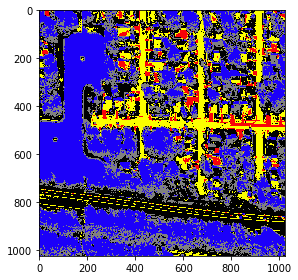

In [10]:
from sklearn.cluster import KMeans
X = image.reshape(rows*cols, bands)

In [11]:
supervised = n_classes*np.ones(shape=(rows, cols), dtype=np.int)

supervised[350:400, 350:400] = classes['building']
supervised[850:900, 0:50] = classes['trees']
supervised[500:550, 0:50] = classes['water']
supervised[420:479, 250:300] = classes['road']
supervised[270:320, 200:250] = classes['ground']

In [12]:
y = supervised.ravel()


In [13]:
train = np.flatnonzero(supervised < n_classes)
test = np.flatnonzero(supervised == n_classes)

In [14]:
from sklearn.svm import SVC

In [15]:
clf = SVC(gamma='auto')

In [16]:
clf.fit(X[train], y[train])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y[test] = clf.predict(X[test])

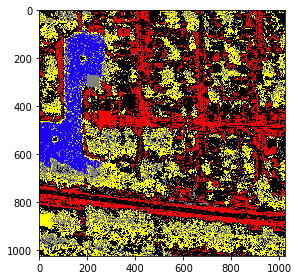

In [18]:
supervised = y.reshape(rows, cols)

io.imshow(palette[supervised])